# Regression

### 1) Regression models

**Essential preprocessing**

In [1]:
from sklearn import datasets
import pandas as pd, numpy as np, math

*sklearn* stores diverse datasets that can be optionally converted into a dataframe

In [2]:
boston = datasets.load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["target"] = boston.target
df.head()

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let us now split data for evaluation purposes

In [3]:
from sklearn.model_selection import train_test_split

X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print("train:",X_train.shape,"\ntest:",X_test.shape)

train: (354, 13) 
test: (152, 13)


**Classic linear regression models**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("intercept:",lr.intercept_)
print("coefficients:",lr.coef_)

intercept: 35.839894311579776
coefficients: [-1.02065294e-01  3.92035307e-02 -6.13494400e-02  3.48084703e+00
 -1.74598953e+01  3.66444175e+00 -5.31304197e-03 -1.37067900e+00
  2.51447673e-01 -9.43832755e-03 -8.58133141e-01  6.78308990e-03
 -4.96519703e-01]


In [6]:
from sklearn import metrics

pred_train_lr= lr.predict(X_train)
print("reference:\n",y_train[0:20],"\n\npredictions:\n",pred_train_lr[0:20])

reference:
 [23.3 15.  23.7 20.9 26.6 13.  19.9 20.3 18.1 32.7 18.4 22.3 21.1 31.5
 17.8 21.8 18.5 14.8 29.8 20.6] 

predictions:
 [21.90120073 15.12718941 25.86623702 21.14525815 27.93801949 16.40015363
 17.91715993 22.19497631 16.28938292 30.24731583 17.60199653 26.78180535
 20.7844608  31.93193273 21.29283751 20.44635959 19.35414797 15.01820531
 32.15005741 18.80014414]


In [7]:
print("Training RMSE:",np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr)))
print("Training R2:",metrics.r2_score(y_train, pred_train_lr))

Training RMSE: 4.284146230476762
Training R2: 0.7431215456774967


In [8]:
pred_test_lr= lr.predict(X_test)
print("RMSE (no regularization):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print("R2 (no regularization):",metrics.r2_score(y_test, pred_test_lr))

RMSE (no regularization): 5.641775532184689
R2 (no regularization): 0.7215519718844141


In [9]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print("RMSE (Ridge):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 
print("R2 (Ridge):",metrics.r2_score(y_test, pred_test_rr))

RMSE (Ridge): 5.64169381818958
R2 (Ridge): 0.7215600377622226


In [10]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print("RMSE (Lasso):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_lasso))) 
print("R2 (Lasso):",metrics.r2_score(y_test, pred_test_lasso))

RMSE (Lasso): 5.641926307796152
R2 (Lasso): 0.7215370887213186


**Non-parametric regressors**

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
pred_test_tree = tree_regressor.predict(X_test)
print("RMSE (DTree):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_tree))) 
print("R2 (DTree):",metrics.r2_score(y_test, pred_test_tree))

RMSE (DTree): 6.049526949753136
R2 (DTree): 0.6798486243614732


In [13]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
pred_test_knn = knn_regressor.predict(X_test)
print("RMSE (kNN):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_knn))) 
print("R2 (kNN):",metrics.r2_score(y_test, pred_test_knn))

RMSE (kNN): 7.457041003395099
R2 (kNN): 0.5135417166351847


**Cross-validation** (identical to our previous notebook)

In [14]:
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
cross_val_score(regressor, X, y, cv=10)

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

### 2) Evaluation

Let us recover our linear model for residual analysis on the testing set

In [15]:
y_true, y_pred = y_test, pred_test_lr
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_true, y_pred))
print("Train R2:",metrics.r2_score(y_true, y_pred))
print("Test R2:",metrics.r2_score(y_true, y_pred))

RMSE: 5.641775532184689
MAE: 3.9079661456255614
Train R2: 0.7215519718844141
Test R2: 0.7215519718844141


Let us recover our linear model for residual analysis on CV folds

In [16]:
regressor = LinearRegression()
print("MSE:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')))
print("MAE:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')))
print("Max error:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='max_error')))
print("Test R2:",np.mean(cross_val_score(regressor, X, y, cv=10, scoring='r2')))

MSE: 34.705255944524936
MAE: 4.0049466353239955
Max error: 14.24417284756449
Test R2: 0.2025289900605535


In [17]:
metrics.r2_score(y_true, y_pred) #R2 on testing set

0.7215519718844141

### 3) Regression over mixed data

**Loading** case dataset

In [18]:
dataurl = 'https://raw.githubusercontent.com/buruzaemon/me-ml/master/ISLR/Data/Advertising.csv'
data = pd.read_csv(dataurl, index_col=0)
print("Number of instances:",data.shape)

#adding a binary attribute
data['Size'] = 'small'
mask_large = np.random.rand(len(data)) > 0.5
data.loc[mask_large, 'Size'] = 'large'

#adding a nominal attribute
nums = np.random.rand(len(data))
data['Area'] = 'rural'
data.loc[(nums > 0.33) & (nums < 0.66), 'Area'] = 'suburban'
data.loc[nums > 0.66, 'Area'] = 'urban'

data.head()

Number of instances: (200, 4)


,TV,Radio,Newspaper,Sales,Size,Area
1,230.1,37.8,69.2,22.1,large,urban
2,44.5,39.3,45.1,10.4,large,suburban
3,17.2,45.9,69.3,9.3,large,rural
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


**Visualizing** data (assuming *Sales* is the output variable)

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

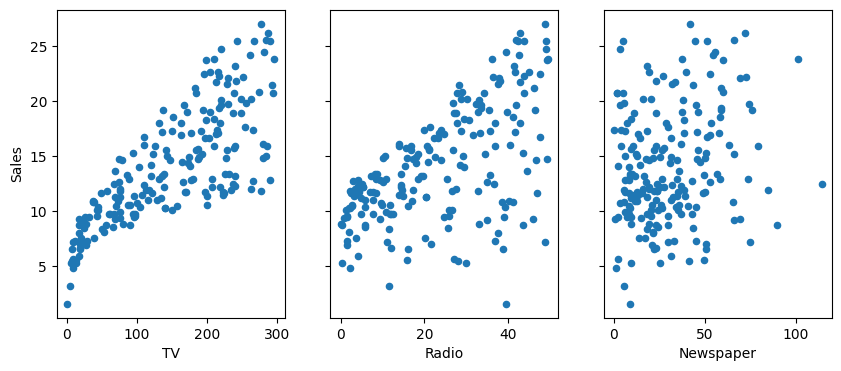

In [19]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 4))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

<AxesSubplot: xlabel='Area', ylabel='Sales'>

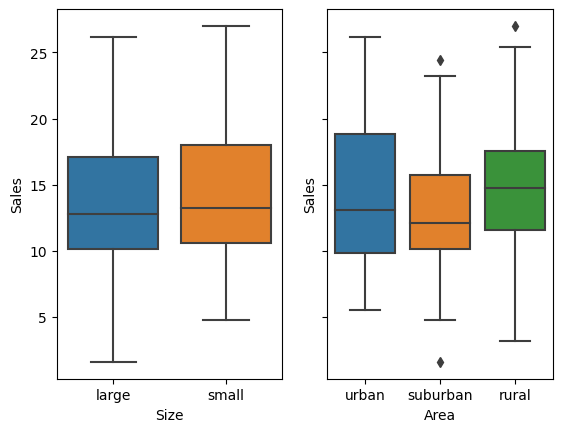

In [20]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="Size", y="Sales", data=data, ax=axs[0])
sns.boxplot(x="Area", y="Sales", data=data, ax=axs[1])

**Preparing data for regressors unable to handle categoric data**:<br>
1) binary variables should be maintained (no dummification)<br>
2) nominal variables should be mapped into a compact set of binary variables

In [21]:
dendata = data.copy()
dendata['IsLarge'] = data.Size.map({'small':0, 'large':1})
#del dendata['Size']

# create 3 dummy variables and then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:,1:]
dendata = pd.concat([dendata, area_dummies], axis=1)
del dendata['Area']

dendata.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,0,1
2,44.5,39.3,45.1,10.4,large,1,1,0
3,17.2,45.9,69.3,9.3,large,1,0,0
4,151.5,41.3,58.5,18.5,small,0,0,1
5,180.8,10.8,58.4,12.9,large,1,1,0


Applying **classic regressors**: nominal data needs to be removed or denormalized

In [22]:
# removal of categorical variables
X_rem, y_rem = data[['TV', 'Radio', 'Newspaper']], data.Sales
lm_rem = LinearRegression()
lm_rem.fit(X_rem, y_rem)
print("Intercept:",lm_rem.intercept_,"\nCoefficients:",lm_rem.coef_,"\nR2:",lm_rem.score(X_rem, y_rem))

Intercept: 2.938889369459412 
Coefficients: [ 0.04576465  0.18853002 -0.00103749] 
R2: 0.8972106381789522


In [23]:
# inclusion of categorical variables
X_all, y_all = dendata[['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']], dendata.Sales
lm_all = LinearRegression()
print("Accuracy in the absence of categorical vars: ",np.mean(cross_val_score(lm_rem, X_rem, y_rem, cv=10)))
print("Accuracy in the presence of categorical vars:",np.mean(cross_val_score(lm_all, X_all, y_all, cv=10)))

Accuracy in the absence of categorical vars:  0.8853562237979616
Accuracy in the presence of categorical vars: 0.8842458332394513


In [24]:
# estimate sales for two real-valued observations
lm_rem.predict([[100, 25, 25], [50, 50, 50]])

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.20266701, 14.60174784])